<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Посмотрите,-как-меняется-концентрация-металлов-(Au,-Ag,-Pb)-на-различных-этапах-очистки.-Опишите-выводы." data-toc-modified-id="Посмотрите,-как-меняется-концентрация-металлов-(Au,-Ag,-Pb)-на-различных-этапах-очистки.-Опишите-выводы.-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Посмотрите, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки. Опишите выводы.</a></span></li><li><span><a href="#Сравните-распределения-размеров-гранул-сырья-на-обучающей-и-тестовой-выборках.-Если-распределения-сильно-отличаются-друг-от-друга,-оценка-модели-будет-неправильной." data-toc-modified-id="Сравните-распределения-размеров-гранул-сырья-на-обучающей-и-тестовой-выборках.-Если-распределения-сильно-отличаются-друг-от-друга,-оценка-модели-будет-неправильной.-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Сравните распределения размеров гранул сырья на обучающей и тестовой выборках. Если распределения сильно отличаются друг от друга, оценка модели будет неправильной.</a></span></li><li><span><a href="#Исследуйте-суммарную-концентрацию-всех-веществ-на-разных-стадиях:-в-сырье,-в-черновом-и-финальном-концентратах." data-toc-modified-id="Исследуйте-суммарную-концентрацию-всех-веществ-на-разных-стадиях:-в-сырье,-в-черновом-и-финальном-концентратах.-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Исследуйте суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.</a></span></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><span><a href="#Напишите-функцию-для-вычисления-итоговой-sMAPE" data-toc-modified-id="Напишите-функцию-для-вычисления-итоговой-sMAPE-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Напишите функцию для вычисления итоговой sMAPE</a></span></li><li><span><a href="#Обучите-разные-модели-и-оцените-их-качество-кросс-валидацией.-Выберите-лучшую-модель-и-проверьте-её-на-тестовой-выборке.-Опишите-выводы." data-toc-modified-id="Обучите-разные-модели-и-оцените-их-качество-кросс-валидацией.-Выберите-лучшую-модель-и-проверьте-её-на-тестовой-выборке.-Опишите-выводы.-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Обучите разные модели и оцените их качество кросс-валидацией. Выберите лучшую модель и проверьте её на тестовой выборке. Опишите выводы.</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных - нужно смоделировать процесс восстановления золота из золотосодержащей руды.
3. Построить и обучить модель. - для решения задачи, вводим метрику Smape(Она одинаково учитывает масштаб и целевого признака, и предсказания.)

Нужно спрогнозировать сразу две величины:
1. эффективность обогащения чернового концентрата rougher.output.recovery;
2. эффективность обогащения финального концентрата final.output.recovery.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

## Подготовка данных

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from IPython.display import display
from sklearn.model_selection import train_test_split
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import GridSearchCV


In [2]:
warnings.filterwarnings("ignore")

In [3]:
data_train=pd.read_csv('/datasets/gold_recovery_train_new.csv')
display(data_train.head())

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [4]:
data_test=pd.read_csv('/datasets/gold_recovery_test_new.csv')
display(data_test.head())

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [5]:
data_full=pd.read_csv('/datasets/gold_recovery_full_new.csv')
display(data_full.head())

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [6]:
def fun_date(data):
    print('**Общая информация датафрейма**')
    print(data.info())
    print('-------------------------------------------------------------------------------------------------------------')
    print('**Просмотр статистических данных**')
    print(data.describe())
    print('-------------------------------------------------------------------------------------------------------------')
    print('**Вывод рандомных строк датафрейма**')
    print(data.sample(n=3, random_state=1))
    print('-------------------------------------------------------------------------------------------------------------')
    print('**Вывод первых пяти строк датафрейма**')
    print(data.head())
    print('-------------------------------------------------------------------------------------------------------------')
    print('**Вывод количесва дубликатов датафрейма**')
    print(data.duplicated().sum())
    print('-------------------------------------------------------------------------------------------------------------')
    print('**Вывод количесва пропущеных значений датафрейма**')
    print(data.isnull().sum())
    print('-------------------------------------------------------------------------------------------------------------')
print(fun_date(data_train))
print(fun_date(data_test))
print(fun_date(data_full))

**Общая информация датафрейма**
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
date                                                  14149 non-null object
final.output.concentrate_ag                           14148 non-null float64
final.output.concentrate_pb                           14148 non-null float64
final.output.concentrate_sol                          13938 non-null float64
final.output.concentrate_au                           14149 non-null float64
final.output.recovery                                 14149 non-null float64
final.output.tail_ag                                  14149 non-null float64
final.output.tail_pb                                  14049 non-null float64
final.output.tail_sol                                 14144 non-null float64
final.output.tail_au                                  14149 non-null float64
primary_cleaner.input.sulfate                         14129 non-null float64
primary_clean

In [7]:
#Переводим столбец с датой в нужный верменной формат 
data_train['date'] = pd.to_datetime(data_train['date'], format='%Y-%m-%dT%H:%M:%S')
data_test['date'] = pd.to_datetime(data_test['date'], format='%Y-%m-%dT%H:%M:%S')
data_full['date'] = pd.to_datetime(data_full['date'], format='%Y-%m-%dT%H:%M:%S')

In [8]:
#Смотрим количесво занимаемой памяти для каждого типа
def memory(data):
    for dtype in ['float','int','object']:
        selected_dtype = data.select_dtypes(include=[dtype])
        mean_usage_b = selected_dtype.memory_usage(deep=True).mean()
        mean_usage_mb = mean_usage_b / 1024 ** 2
        print("Average memory usage for {} columns: {:03.2f} MB".format(dtype,mean_usage_mb))
print(memory(data_train))
print()
print(memory(data_test))
print()
print(memory(data_full))

Average memory usage for float columns: 0.11 MB
Average memory usage for int columns: 0.00 MB
Average memory usage for object columns: 0.00 MB
None

Average memory usage for float columns: 0.04 MB
Average memory usage for int columns: 0.00 MB
Average memory usage for object columns: 0.00 MB
None

Average memory usage for float columns: 0.15 MB
Average memory usage for int columns: 0.00 MB
Average memory usage for object columns: 0.00 MB
None


<font color='blue'>Датафрейм "Обучающая выборка" и "Исходные данные" занимают на мой взглят много памяти и стоит её слегка подсократить </font>

In [9]:
#преобразуем float64 в float32
def mem_usage(pandas_obj):
    if isinstance(pandas_obj,pd.DataFrame):
        usage_b = pandas_obj.memory_usage(deep=True).sum()
    else: # исходим из предположения о том, что если это не DataFrame, то это Series
        usage_b = pandas_obj.memory_usage(deep=True)
    usage_mb = usage_b / 1024 ** 2 # преобразуем байты в мегабайты
    return "{:03.2f} MB".format(usage_mb)

data_float = data_train.select_dtypes(include=['float'])
converted_float = data_float.apply(pd.to_numeric,downcast='float')

print(mem_usage(data_float))
print(mem_usage(converted_float))
print()

compare_floats = pd.concat([data_float.dtypes,converted_float.dtypes],axis=1)
compare_floats.columns = ['before','after']
compare_floats.apply(pd.Series.value_counts)

def mem_usage(pandas_obj):
    if isinstance(pandas_obj,pd.DataFrame):
        usage_b = pandas_obj.memory_usage(deep=True).sum()
    else: # исходим из предположения о том, что если это не DataFrame, то это Series
        usage_b = pandas_obj.memory_usage(deep=True)
    usage_mb = usage_b / 1024 ** 2 # преобразуем байты в мегабайты
    return "{:03.2f} MB".format(usage_mb)

data_float = data_full.select_dtypes(include=['float'])
converted_float = data_float.apply(pd.to_numeric,downcast='float')

print(mem_usage(data_float))
print(mem_usage(converted_float))

compare_floats = pd.concat([data_float.dtypes,converted_float.dtypes],axis=1)
compare_floats.columns = ['before','after']
compare_floats.apply(pd.Series.value_counts)

9.28 MB
4.64 MB

12.75 MB
6.38 MB


,before,after
float32,NaN,86.0
float64,86.0,NaN


In [10]:
data_train = data_train.copy()
data_train[converted_float.columns] = converted_float
print(mem_usage(data_train))
print()
data_full = data_full.copy()
data_full[converted_float.columns] = converted_float
print(mem_usage(data_full))
print()

4.75 MB

6.53 MB



In [11]:
#data_train.info(memory_usage='deep')

In [12]:
#data_test.info(memory_usage='deep')

In [13]:
#data_full.info(memory_usage='deep')

In [14]:
data_train=data_train.fillna(value=None, method="ffill") 
data_test=data_test.fillna(value=None, method="ffill") 
data_full=data_full.fillna(value=None, method="ffill") 

<font color='blue'>Удалось сократить память выбранных датафреймов на 50%</font>

<font color='orange'>Насчет самих данных, не уверен стоит ли их переводить в целочисленные, как мне кажется, если вопрос идет о концетрации, то лучше видеть перед глазами более точные данные, нежели округленные</font>

<font color='blue'>В тестовой выборке отсутвуют порядка 200+ входных значений. И это отчевидно, тк данные свежие и только поступили на вход, что будет по итогу пока не понятно,удалять бы я их не стал, поэтому лучше их заполним методом fill</font>

<font color='blue'>Предобработка завершена - можно приступать к работе!</font>

In [15]:
data_train_mae=data_train
data_train_mae=data_train.dropna()

In [16]:
C=data_train_mae['rougher.output.concentrate_au']
print(C.isna().value_counts())
F=data_train_mae['rougher.input.feed_au']
print(F.isna().value_counts())
T=data_train_mae['rougher.output.tail_au']
print(T.isna().value_counts())
A=C*(F-T)
B=F*(C-T)
data_train_mae['rougher_recovery']=(A/B)*100
print(data_train_mae['rougher_recovery'].isna().value_counts())
print(mean_absolute_error(data_train_mae['rougher.output.recovery'], data_train_mae['rougher_recovery']))

False    14149
Name: rougher.output.concentrate_au, dtype: int64
False    14149
Name: rougher.input.feed_au, dtype: int64
False    14149
Name: rougher.output.tail_au, dtype: int64
False    14149
Name: rougher_recovery, dtype: int64
3.9986717e-06


<font color='blue'>Полученная ошибка порядка 10^-6 не совсем критично как мне кажется.</font>

## Анализ данных

###  Посмотрите, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки. Опишите выводы.

In [17]:
print('Флострация концетрации au:', data_full['rougher.output.concentrate_au'].mean())
print('Первичная очистка концетрации au:', data_full['primary_cleaner.output.concentrate_au'].mean())
print('Финальная концетрация au:', data_full['final.output.concentrate_au'].mean())
print()
print('Флострация концетрации ag:', data_full['rougher.output.concentrate_ag'].mean())
print('Первичная очистка концетрации ag:', data_full['primary_cleaner.output.concentrate_ag'].mean())
print('Финальная концетрация ag:', data_full['final.output.concentrate_ag'].mean())
print()
print('Флострация концетрации pb:', data_full['rougher.output.concentrate_pb'].mean())
print('Первичная очистка концетрации pb:', data_full['primary_cleaner.output.concentrate_pb'].mean())
print('Финальная концетрация pb:', data_full['final.output.concentrate_pb'].mean())

Флострация концетрации au: 19.772001
Первичная очистка концетрации au: 32.1194
Финальная концетрация au: 44.07651

Флострация концетрации ag: 11.9947605
Первичная очистка концетрации ag: 8.442408
Финальная концетрация ag: 5.1683865

Флострация концетрации pb: 7.606272
Первичная очистка концетрации pb: 9.810317
Финальная концетрация pb: 9.978822


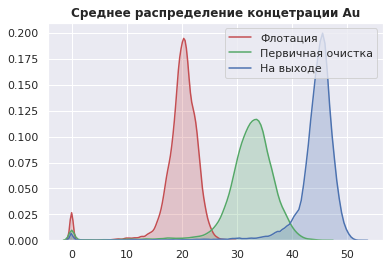

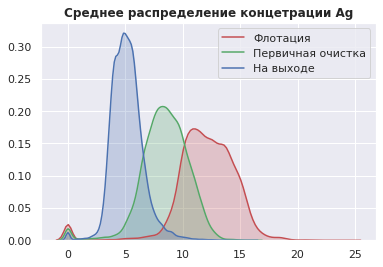

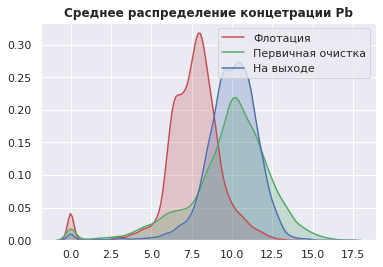

In [18]:
# set seaborn darkgrid theme
sns.set(style="darkgrid")

# density plot
plt.title('Среднее распределение концетрации Au', fontweight='bold')
fig = sns.kdeplot(data_full['rougher.output.concentrate_au'],color='r', legend=True,shade=True)
fig = sns.kdeplot(data_full['primary_cleaner.output.concentrate_au'],color='g', legend=True,shade=True)
fig = sns.kdeplot(data_full['final.output.concentrate_au'],color='b', legend=True,shade=True)
plt.legend(['Флотация', 'Первичная очистка', "На выходе" ], loc=1)     
plt.show()

plt.title('Среднее распределение концетрации Ag', fontweight='bold')
fig = sns.kdeplot(data_full['rougher.output.concentrate_ag'],color='r', legend=True,shade=True)
fig = sns.kdeplot(data_full['primary_cleaner.output.concentrate_ag'],color='g', legend=True,shade=True)
fig = sns.kdeplot(data_full['final.output.concentrate_ag'],color='b', legend=True,shade=True)
plt.legend(['Флотация', 'Первичная очистка', "На выходе" ], loc=1)     
plt.show()

plt.title('Среднее распределение концетрации Pb', fontweight='bold')
fig = sns.kdeplot(data_full['rougher.output.concentrate_pb'],color='r', legend=True,shade=True)
fig = sns.kdeplot(data_full['primary_cleaner.output.concentrate_pb'],color='g', legend=True,shade=True)
fig = sns.kdeplot(data_full['final.output.concentrate_pb'],color='b', legend=True,shade=True)
plt.legend(['Флотация', 'Первичная очистка', "На выходе" ], loc=1)     
plt.show()

<font color='blue'>Самые хорошие показатели у свинца - на него требуется меньше затрат усилий

На каждом из графиков видны аномальные значения в нуле. Вероятно это отвальные хвосты каждого элемента. Также на графике концетрации Au можно заметить нормальное распределение велечин, а на графиках Ag и Pb бимодальное распределение, что дает двоичный результат - видимо поэтому значение у Au много больше, чем у остальных.</font>

###  Сравните распределения размеров гранул сырья на обучающей и тестовой выборках. Если распределения сильно отличаются друг от друга, оценка модели будет неправильной.

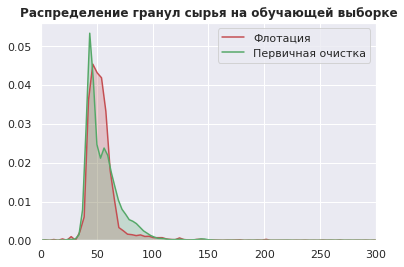

In [19]:
plt.title('Распределение гранул сырья на обучающей выборке', fontweight='bold')
fig = sns.kdeplot(data_train['rougher.input.feed_size'],color='r', legend=True,shade=True)
fig = sns.kdeplot(data_test['rougher.input.feed_size'],color='g', legend=True,shade=True)
plt.legend(['Флотация', 'Первичная очистка'], loc=1)     
plt.xlim(0, 300)
plt.show()


In [20]:
feed_size_avg_train = data_train['rougher.input.feed_size'].mean()
print('Среднее распределение гранул на обучающей выборке:',feed_size_avg_train)
feed_size_avg_test = data_test['rougher.input.feed_size'].mean()
print('Среднее распределение гранул на тестовой выборке:',feed_size_avg_test)

Среднее распределение гранул на обучающей выборке: 55.4825
Среднее распределение гранул на тестовой выборке: 55.95275402889513


<font color='blue'>Распределения практически не отличаются друг от друга - оценка модели правильная</font>

###  Исследуйте суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.

In [21]:
data_train1=data_train
data_train1=data_train1.dropna()
data_train1['raw']=data_train['rougher.input.feed_au']+data_train['rougher.input.feed_ag']+data_train['rougher.input.feed_pb']#сырье
data_train1['rough']=data_train['rougher.output.concentrate_au']+data_train['rougher.output.concentrate_au']+data_train['rougher.output.concentrate_au']#черновой
data_train1['primary']=data_train['primary_cleaner.output.concentrate_au']+data_train['primary_cleaner.output.concentrate_ag']+data_train['primary_cleaner.output.concentrate_pb']#первичная
data_train1['final']=data_train['final.output.concentrate_au']+data_train['final.output.concentrate_ag']+data_train['final.output.concentrate_pb']#финальная

In [22]:
data_train1=data_train1.query('rough > 20 & raw>20 & final>20 & primary >20')

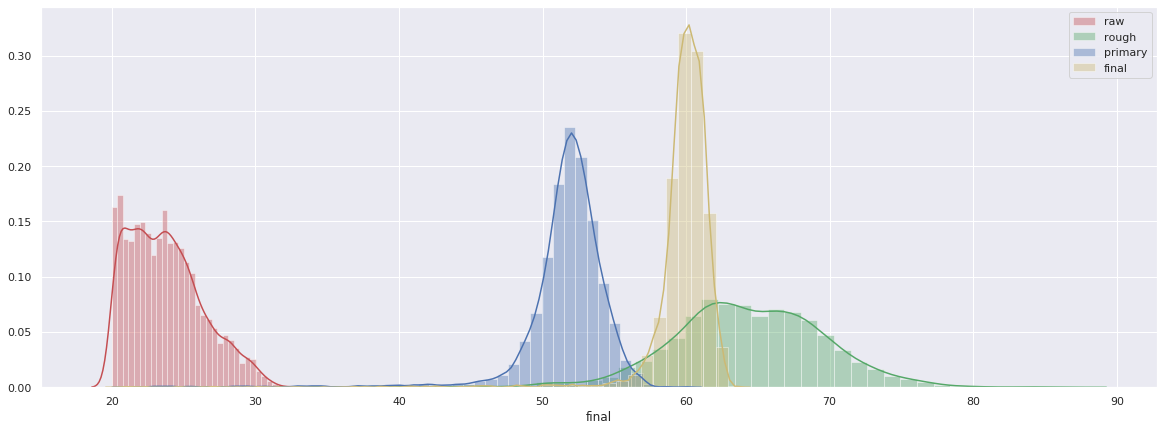

In [23]:
fig = plt.subplots(figsize=(20, 7))
fig = sns.distplot(a=data_train1['raw'], hist=True, kde=True, rug=False , color="r")
fig = sns.distplot(a=data_train1['rough'], hist=True, kde=True, rug=False , color="g")
fig = sns.distplot(a=data_train1['primary'], hist=True, kde=True, rug=False , color="b")
fig = sns.distplot(a=data_train1['final'], hist=True, kde=True, rug=False , color="y")
plt.legend(['raw', 'rough', 'primary', 'final'], loc=1)
plt.show()

<font color='blue'>Финального концетрата остается не так уже и много, по сравнению со входом

Черновой, первичный, финальный концетрат имеет нормальное распределение - сказать про них особо и нечего, все ок)) А у сырьевого концетрата многомодальное распределение, что свидетельствует о неоднородности данных, возможно некоторые значения ошибочны, но я думаю это больше к вопросу о гипотезах. Также присутвуют аномальные значения в нуле, если мы рассматриваем концетрацию на несколькольких стадиях, то я бы не чистил эти данные, но это не точно))</font>

## Модель

### Напишите функцию для вычисления итоговой sMAPE

In [24]:
def smape(a, f):
    return 1/len(a) * np.sum(2 * np.abs(f-a) / (np.abs(a) + np.abs(f))*100)

###  Обучите разные модели и оцените их качество кросс-валидацией. Выберите лучшую модель и проверьте её на тестовой выборке. Опишите выводы.

In [25]:
#эффективность обогащения чернового концентрата rougher.output.recovery;
#эффективность обогащения финального концентрата final.output.recovery.

In [26]:
train_target1=data_train['rougher.output.recovery']
train_target2=data_train['final.output.recovery']
train_features=data_train[data_test.columns].drop('date', axis=1)
train_features.shape

(14149, 52)

In [27]:
data_full_target=data_full[['date','rougher.output.recovery','final.output.recovery']]
data_test_ready = data_test.merge(data_full_target,  on='date', how='left')
data_test_ready=data_test_ready.dropna()

In [28]:
test_features=data_test_ready.drop(['date','rougher.output.recovery', 'final.output.recovery'], axis=1)
print(test_features.shape)
test_target1=data_test_ready['rougher.output.recovery']
test_target2=data_test_ready['final.output.recovery']

(5290, 52)


def DTR (train_features, train_target, test_features, test_target):
    best_model = None 
    best_result = 100 
    best_depth = 0 
    smape1=0 
    for depth in range (1, 21):
        model = DecisionTreeRegressor(random_state=12345, max_depth=depth) 
        model.fit(train_features, train_target) 
        result=model.predict(test_features) 
        smape1=smape(test_target, result) 
        if smape1 < best_result:
            best_model = model 
            best_result = smape1 
            best_depth = depth
    print("Точность наилучшей модели на тестовой выборке:", best_result, "Максимальная глубина:", best_depth)

DTR(train_features, train_target1, test_features, test_target1) 
DTR(train_features, train_target2, test_features, test_target2)

def RFR (train_features, train_target, test_features, test_target): 
    best_model = None 
    best_result = 100 
    best_depth = 0 
    smape1=0 
    best_est=0 
    for est in range(10, 51, 10): 
        for depth in range (1, 11): 
            model = RandomForestRegressor(random_state=12345, n_estimators=est, max_depth=depth) 
            model.fit(train_features, train_target) 
            result=model.predict(test_features) 
            smape1=smape(test_target, result) 
            if smape1 < best_result: 
                best_model = model 
                best_result = smape1 
                best_depth = depth 
                best_est = est
    print("RMSE наилучшей модели на валидационной выборке:", best_result, 
      "Количество деревьев:", best_est, "Максимальная глубина:", best_depth)

RFR(train_features, train_target1, test_features, test_target1) 
RFR(train_features, train_target2, test_features, test_target2)


<div class="alert alert-info"> <b>Комментарий :</b>Разбил данные на фичи и таргеты, таргеты для тестовой выборки взял из общего набора данных
</div>

In [29]:
model_lr =LinearRegression() 
model_lr.fit(train_features, train_target1)
result=model_lr.predict(test_features)
smape1=smape(test_target1, result) 
print('Smape обогащения чернового концентрата: {:.2f}'.format(smape1))


Smape обогащения чернового концентрата: 9.21


In [30]:
model_lr1 =LinearRegression() 
model_lr1.fit(train_features, train_target2)
result1=model_lr1.predict(test_features)
smape1=smape(test_target2, result1) 
print('Smape обогащения финального концентрата: {:.2f}'.format(smape1))

Smape обогащения финального концентрата: 9.31


In [31]:
model_rougher=RandomForestRegressor(random_state=12345, n_estimators=40, max_depth=1)
model_rougher.fit(train_features, train_target1) 
result=model_rougher.predict(test_features)
smape_rougher=smape(test_target1, result)
scores_rougher = cross_val_score(model_rougher, test_features, result, cv=5)
final_score = scores_rougher.mean()
print('Smape обогащения чернового концентрата: {:.2f}'.format(smape_rougher))
print(scores_rougher)

Smape обогащения чернового концентрата: 9.77
[0.9717534  0.95541806 0.93854929 0.31197894 0.90860159]


In [32]:
model_final=LinearRegression(copy_X=True, normalize = True)
model_final.fit(train_features, train_target2) 
result1=model_final.predict(test_features)
smape_final=smape(test_target2, result1)
scores_final = cross_val_score(model_final, test_features, result1, cv=5)
final_score1 = scores_final.mean()
print('{:.2f}'.format(smape_final))

9.31


In [33]:
model_final1=RandomForestRegressor(random_state=12345, n_estimators=40, max_depth=7)
model_final1.fit(train_features, train_target2) 
result=model_final1.predict(test_features)
smape_final1=smape(test_target2, result)
scores_final = cross_val_score(model_final1, test_features, result, cv=5)
final_score1 = scores_final.mean()
print('Smape обогащения финального концентрата: {:.2f}'.format(smape_final1))
print(final_score1)

Smape обогащения финального концентрата: 8.23
0.6473478793909486


<font color='blue'>Используем модель "Случайный лес в регрессии". Был рассмотрен гиперпараметр с глубиной дерева=7. Метрики брал по 5. По итогу эта модель проявила себя куда лучше, относительно линейной регрессии.
    
Лучше всего себя показал Случайный лес в регрессии - будем работать с ним </font>

In [34]:
total_smape=0.25*smape_rougher+0.75*smape_final1
print('Итоговое симметричное среднее абсолютное процентное отклонение: {:.2f} %'.format(total_smape))

Итоговое симметричное среднее абсолютное процентное отклонение: 8.61 %


<font color='blue'>Отклонение 8% не есть хорошо, но и не так уж и плохо</font>

In [35]:
from sklearn.metrics import make_scorer
scores = make_scorer(smape, greater_is_better = False)
def lr_gridsearchcv(features, target, scores):
    model = LinearRegression()
    param_grid = {
        'copy_X':[True, False],
        'fit_intercept' : [True, False],
        'normalize':[True,False]
    }
    #param_grid = { 'n_estimators': range (40, 50, 5),
    #          'max_depth': range (5,13, 2),
    #          'min_samples_leaf': range (1,8),
    #          'min_samples_split': range (2,10,2) }
    
    my_scorer = make_scorer(scores, greater_is_better=False)
    CV = GridSearchCV(estimator = model, param_grid = param_grid, cv=5, scoring = my_scorer)
    CV.fit(features, target)
    print('Лучшее значение метрики: {:.2f}'.format(-CV.best_score_))
    print('Лучшие гиперпараметры: ', CV.best_params_)
    return CV.best_params_ 

lr_gridsearchcv(train_features, train_target1, smape)
lr_gridsearchcv(train_features, train_target2, smape)

Лучшее значение метрики: 11.98
Лучшие гиперпараметры:  {'copy_X': True, 'fit_intercept': False, 'normalize': True}
Лучшее значение метрики: 11.20
Лучшие гиперпараметры:  {'copy_X': True, 'fit_intercept': False, 'normalize': True}


{'copy_X': True, 'fit_intercept': False, 'normalize': True}

from sklearn.metrics import make_scorer
scores = make_scorer(smape, greater_is_better = False)
def lr_gridsearchcv(features, target, scores):
    model = RandomForestRegressor()
    param_grid = { 'n_estimators': range (48, 50, 5),
              'max_depth': range (11,13, 2),
              'min_samples_leaf': range (1,4),
              'min_samples_split': range (2,6,2) }
    
    my_scorer = make_scorer(scores, greater_is_better=False)
    CV = GridSearchCV(estimator = model, param_grid = param_grid, cv=5, scoring = my_scorer)
    CV.fit(features, target)
    print('Лучшее значение метрики: {:.2f}'.format(-CV.best_score_))
    print('Лучшие гиперпараметры: ', CV.best_params_)
    return CV.best_params_ 

lr_gridsearchcv(train_features, train_target1, smape)
lr_gridsearchcv(train_features, train_target2, smape)

data_train['rougher.output.recovery'].fillna("missing", inplace=True) 
X_train = data_train.drop('rougher.output.recovery', axis=1)
y_train = data_train['rougher.output.recovery']
clf = RandomForestRegressor()
parametrs = { 'n_estimators': range (10, 51, 10),
              'max_depth': range (1,13, 2),
              'min_samples_leaf': range (1,8),
              'min_samples_split': range (2,10,2) }

grid = GridSearchCV(clf, parametrs, cv=5)
grid.fit(X_train, y_train)


print(grid.best_params_)


<div class="alert alert-info"> <b>Комментарий :</b> В своем старом варианте метод data_train['rougher.output.recovery'].fillna("missing", inplace=True)  не сработал((
    Сделал по другому гидсёрч, для линейной регрессии - все ок, а для леса уж больно долго ищет...хз мб зависит от количесва ядер, очень много литературы и ресурсов прошерсил, толкового в голову ничего не пришло, в общем с лесом как то не задалось ¯\_(ツ)_/¯
</div>

## Вывод

Из всей проделанной работы можно сказать, что самым стабильным явлется по технологическому процессу является элемент Au, но самым экономичным все же стал Pb;

В ходе анализа были выявлены аномалии, а точнее значения в нуле, от которых по хорошему лучше избавляться.;

Замечены следующие закономерности - концентрация золота на всех этапах обогащения растет, в сумме возрастает в 4 раза с 8 до 48 пунктов, концентрация свинца растет в 2,5 раза, концетрация серебра падает в 2 раза;

В суммарной концетрации можно заметить, как концетрация на выходе выросла относительно первичной очистки, на несколько пунктов;

Было протестированно две модели "Линейная регрессия" и "Случайный лес в регрессии", лучше всего себя проявил Случайный лес, Smape которого сотавило 8%, что впринципе неплохо.
